## __✅ Definition of Normalization__

- Normalization is a data preprocessing technique that rescales numerical values into a fixed range, usually between 0 and 1.

- Normalization means rescaling numbers so they fit between 0 and 1

__✅ Explanation (Simple Language)__

Different features in your dataset may have very different scales.

Example:

- Age: 0–100

- Salary: 10,000–100,000

Machine learning models get confused when numbers have huge differences.
So we use Normalization to shrink all values to the same scale.

After normalization:

- Age → becomes 0 to 1

- Salary → becomes 0 to 1

This makes learning faster, more accurate, and more stable.

<span style="color:hotpink;">
- smallest value → becomes 0<br>
- largest value → becomes 1<br>
- everything else → lies in between 0 and 1
</span>


## __Types of Normalization__


1. __✅  Min–Max Normalization (0 to 1 scaling)__

Rescales values to a fixed range like 0 to 1.

Formula:


<span style="color:hotpink;">
(x – min) / (max – min)
</span>



Used when:
You want values strictly between 0 and 1 (KNN, Neural Networks, K-Means).

- 📌 Geometric Intuition of Min–Max Scaling (0–1 Normalization)

Min–Max scaling takes values on a long line and squeezes/stretch them into a shorter line between 0 and 1 — without changing the relative positions.

🎯 Before Scaling (Original Space)

Numbers lie on a long axis:

|----|----------------------|------------------------|-----------|
min                     medium                       max
10                       40                          90


Distances are large:

Distance(min, medium) = 30

Distance(medium, max) = 50

🎯 After Min–Max Scaling (0 → 1 Space)

Everything is compressed into the range [0, 1]:

0 ---------------------- 0.375 ------------------------------ 1
min                     medium                                max


Because:

(10 - 10)/(90 - 10)   = 0
(40 - 10)/(90 - 10)   = 0.375
(90 - 10)/(90 - 10)   = 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Krishnaraj singh\Code\newml\Documents!.0\wine.csv',usecols=[0,1,2])
df

,Wine,Alcohol,Malic.acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


# __Train data_

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Wine',axis=1),df['Wine'],train_size=0.3,random_state=0)
x_test
x_train
y_train
y_test

54     1
151    3
63     2
55     1
123    2
      ..
119    2
102    2
35     1
57     1
41     1
Name: Wine, Length: 125, dtype: int64

__Import MinMax scaling__

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[ 0.84952978,  0.11946903],
       [ 0.55172414,  0.34070796],
       [ 0.4200627 ,  0.        ],
       [ 0.79310345,  0.13274336],
       [ 0.63322884,  1.03318584],
       [ 0.1661442 ,  0.20353982],
       [ 0.94984326,  0.22566372],
       [ 0.4169279 ,  0.59734513],
       [ 0.38244514,  0.13274336],
       [ 0.32915361,  0.15486726],
       [ 0.73040752,  0.31637168],
       [ 0.89341693,  0.86504425],
       [ 0.99373041,  0.13938053],
       [ 0.4200627 , -0.01327434],
       [ 0.79937304,  0.32079646],
       [ 0.30407524, -0.04646018],
       [ 0.85579937,  0.08849558],
       [ 0.99059561,  0.10176991],
       [ 0.50470219,  0.05088496],
       [ 0.87774295,  0.11504425],
       [ 0.65203762, -0.02654867],
       [ 0.63322884,  0.11504425],
       [ 0.69278997,  0.32300885],
       [ 0.46394984,  0.13274336],
       [ 0.40752351, -0.00663717],
       [ 0.46708464,  0.28761062],
       [ 0.43887147,  0.08849558],
       [ 0.35423197,  0.10619469],
       [ 0.22884013,

In [12]:
x_train_scaled = pd.DataFrame(x_train_scaled)
x_test_scaled = pd.DataFrame(x_test)
x_train_scaled
x_test_scaled

,Alcohol,Malic.acid
54,13.74,1.67
151,12.79,2.67
63,12.37,1.13
55,13.56,1.73
123,13.05,5.80
...,...,...
119,12.00,3.43
102,12.34,2.45
35,13.48,1.81
57,13.29,1.97


In [13]:
np.round(x_train_scaled.describe(),1)

,0,1
count,53.0,53.0
mean,0.6,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.6,0.2
75%,0.8,0.5
max,1.0,1.0


In [14]:
np.round(x_train.describe(),1)

,Alcohol,Malic.acid
count,53.0,53.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,1.1
25%,12.4,1.6
50%,12.9,1.9
75%,13.6,3.2
max,14.2,5.6


__Graphs__


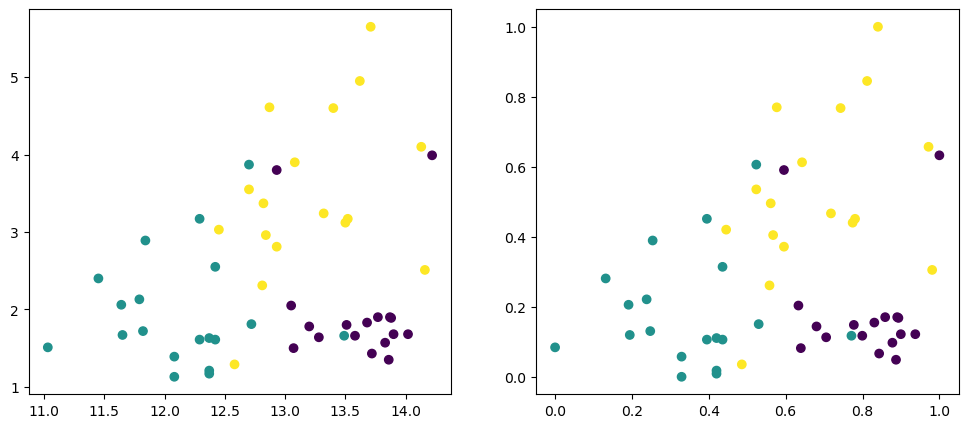

In [19]:
fig,(a,b) = plt.subplots(ncols=2,figsize =(12,5))

a.scatter(x = x_train['Alcohol'],y = x_train['Malic.acid'],c = y_train)
b.scatter(x = x_train_scaled[0],y = x_train_scaled[1],c=y_train)

<Axes: xlabel='0', ylabel='Density'>

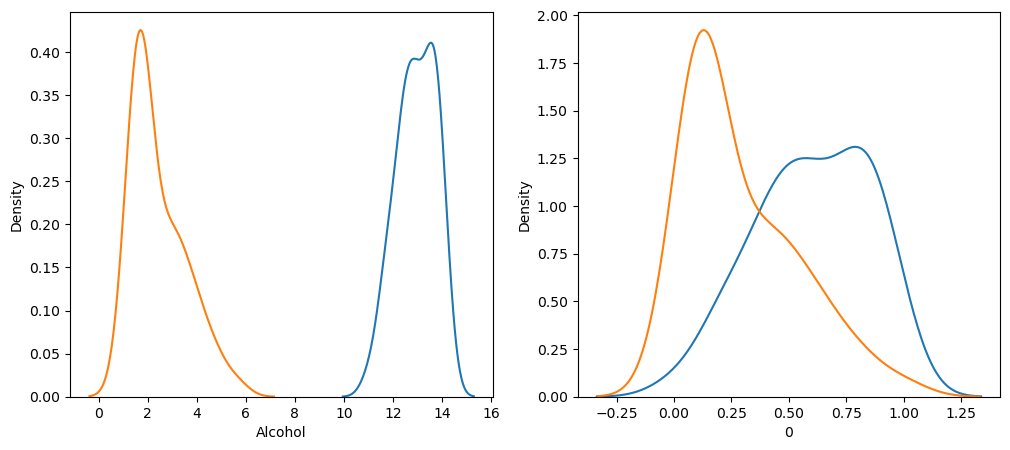

In [22]:
fig,(a,b) = plt.subplots(ncols=2,figsize =(12,5))

sns.kdeplot(x_train['Alcohol'],ax=a)
sns.kdeplot(x_train['Malic.acid'],ax=a)
sns.kdeplot(x_train_scaled[0],ax=b)
sns.kdeplot(x_train_scaled[1],ax=b)


# After scaling both value come in same range and scale

<Axes: xlabel='0', ylabel='Density'>

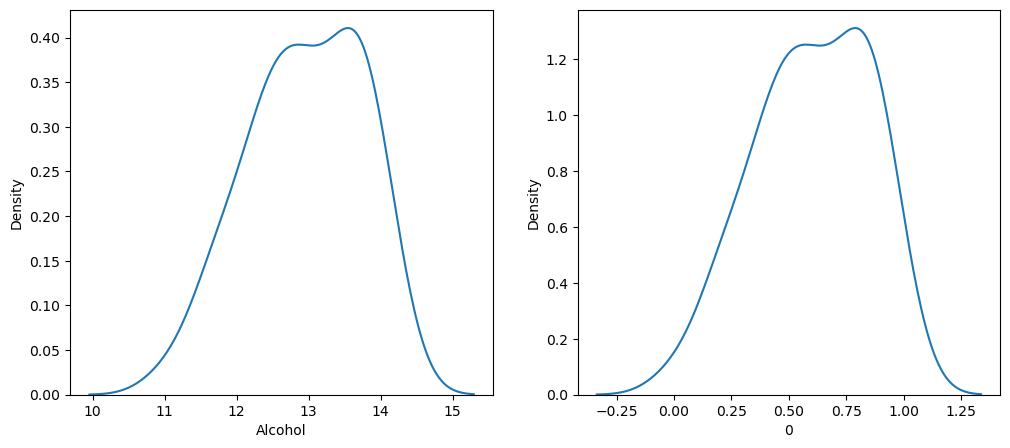

In [23]:
fig,(a,b) = plt.subplots(ncols=2,figsize =(12,5))

sns.kdeplot(x_train['Alcohol'],ax=a)

sns.kdeplot(x_train_scaled[0],ax=b)


<Axes: xlabel='1', ylabel='Density'>

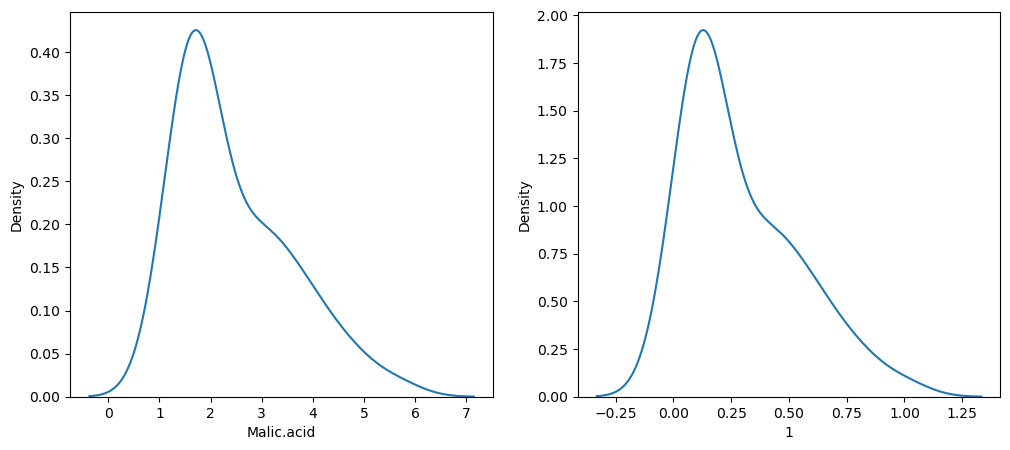

In [24]:
fig,(a,b) = plt.subplots(ncols=2,figsize =(12,5))


sns.kdeplot(x_train['Malic.acid'],ax=a)

sns.kdeplot(x_train_scaled[1],ax=b)

## 2.__Mean Normalization__

__✅ 1. What is Mean Normalization?__

Mean Normalization is a scaling technique where each value is adjusted based on:

- how far it is from the mean,and how wide the range of the data is.
- It converts values into a range typically between –1 and +1.

__✅ 2. Formula__

x_normalized = (x – mean) / (max – min)


__✅ 3. Goal of Mean Normalization__

- Move all features so that their mean becomes 0

- Scale them so that values lie within –1 to +1

- Reduce the effect of different scales

- Make gradient descent faster and more stable

__📌 4. Geometric Intuition__
<h3>Before Mean Normalization</h3>

<pre>
min ----------- mean ---------------------- max
10               40                         90
</pre>

<p>Mean normalization shifts the number line so the mean becomes 0, and the values fit between −1 and +1.</p>

<h3>After Mean Normalization</h3>

<pre>
-1 ----------------- 0 ------------------------- +1
min                 mean                         max
</pre>


<b style="color:red">Is k liye koi class nhi iska code khud se likhna pdega</b>

## 3.__1. What is Max Absolute Scaling?__

- Zeros jyda hote h vnha ise use krte hai.

Max Absolute Scaling (MaxAbs Scaling) scales each feature by dividing it by the maximum absolute value in that feature.

- It transforms values to lie in the range:  -1 to +1

- This scaling preserves sparsity, making it very useful for sparse datasets (lots of zeros).

__✅ 2. Formula__
- x_scaled = x / max(|x|)


Where:

x = original value

max(|x|) = maximum absolute value in the column

__📐 3. Geometric Intuition__

- MaxAbs Scaling takes the entire number line and compresses it so the biggest magnitude becomes ±1.

- Before Scaling:
-80 ----------- -20 ------- 0 -------- 30 ---------------- 90


If max absolute value = 90:

- After MaxAbs Scaling:
- -0.88 -------- -0.22 ------ 0 ------ 0.33 -------------- 1


Every point is divided by 90 → everything lies between −1 and +1.

__📌 4. Key Features__

Scales values between -1 and +1

Does not change the sign of values

Works great for sparse data (text data, TF-IDF, one-hot vectors)

Does not shift the mean (unlike standardization or mean normalization

__🎯 5 . Why MaxAbs Scaling?__

Use it when:

- Your data contains positive and negative values

- Your data is sparse (many zeros)

- You want scaling but no shifting or centering

Used commonly in:

- NLP (TF-IDF vectors)

- Linear models

- Distance-based models

## What is Robust Scaling?

Robust Scaling transforms data using:

$$
x_{\text{scaled}} = \frac{x - \text{median}}{IQR}
$$

Where:

- Median = 50th percentile  
- IQR = Q3 - Q1  
- Q1 → 25th percentile  
- Q3 → 75th percentile  

✔ Uses median and IQR → robust to outliers.


## 📌 Why Use Robust Scaling?

Use the **Robust Scaler** when your data has:

- Outliers present in the dataset  
- Skewed distribution  
- Long-tailed values  
- Need for scaling without being affected by extreme values  

Robust Scaling is effective because it uses:

- **Median**  
- **IQR (Interquartile Range)** = Q3 − Q1  

These statistics are **not influenced by outliers**, unlike mean and standard deviation.


# Geometric Intuition

**Before scaling (original number line):**

- Q1 -------- Median -------- Q3
- 7 10 12